In [1]:
install.packages("rstan", repos = 'https://cloud.r-project.org/', dependencies = TRUE)

also installing the dependencies ‘miniUI’, ‘htmlwidgets’, ‘crosstalk’, ‘packrat’, ‘igraph’, ‘matrixStats’, ‘checkmate’, ‘colourpicker’, ‘DT’, ‘dygraphs’, ‘gtools’, ‘rsconnect’, ‘shinyjs’, ‘shinythemes’, ‘threejs’, ‘ggridges’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘loo’, ‘RcppEigen’, ‘RUnit’, ‘shinystan’, ‘bayesplot’, ‘rstantools’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
pkgbuild::has_build_tools(debug = TRUE)

Trying to compile a simple C file


Running /opt/conda/lib/R/bin/R CMD SHLIB foo.c
x86_64-conda_cos6-linux-gnu-cc -I"/opt/conda/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2  -I/opt/conda/include -Wl,-rpath-link,/opt/conda/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -I/opt/conda/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base_1562026475051/work=/usr/local/src/conda/r-base-3.5.1 -fdebug-prefix-map=/opt/conda=/usr/local/src/conda-prefix  -c foo.c -o foo.o
x86_64-conda_cos6-linux-gnu-cc -shared -L/opt/conda/lib/R/lib -Wl,-O2 -Wl,--sort-common -Wl,--as-needed -Wl,-z,relro -Wl,-z,now -Wl,--disable-new-dtags -Wl,--gc-sections -Wl,-rpath,/opt/conda/lib -Wl,-rpath-link,/opt/conda/lib -L/opt/conda/lib -Wl,-rpath-link,/opt/conda/lib -o foo.so foo.o -L/opt/conda/lib/R/lib -lR


[1] TRUE

In [3]:
library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [4]:
file_beer_sales_1 <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/2-4-1-beer-sales-1.csv")

In [5]:
head(file_beer_sales_1)

sales
<dbl>
87.47
103.67
83.29
131.91
106.59
83.59


In [7]:
sample_size <- nrow(file_beer_sales_1)
sample_size

[1] 100

In [8]:
data_list <- list(sales = file_beer_sales_1$sales, N = sample_size)
data_list

$sales
  [1]  87.47 103.67  83.29 131.91 106.59  83.59 109.75 114.77 111.52  93.89
 [11] 130.24 107.80  87.58  55.71 122.50  99.10  99.68 118.88 116.42 111.88
 [21] 118.38 115.64 101.49  60.21 112.40  98.88  96.88  70.58  90.44 108.36
 [31] 127.17  97.94 107.75  98.92  72.46  91.70  92.11  98.81 122.00 115.26
 [41]  96.71  94.93 113.94 111.13  86.22  85.85 107.29 115.37  97.75 117.62
 [51] 107.96  87.76 106.82  77.41 128.66 139.61  92.66  79.12 111.39  97.30
 [61] 148.03  99.22 113.79 100.56  85.13 103.78  63.90 129.31 103.07 143.45
 [71] 109.51  85.80 112.21  81.32  74.93 105.83  91.13 100.02 101.49  88.21
 [81]  88.63  97.30 123.56  69.53 111.88 106.66 121.26  93.92 107.40 105.34
 [91]  89.15 124.16 123.21 114.00 131.74 111.17  74.47  88.53  75.51  90.53

$N
[1] 100

In [11]:
mcmc_result = stan(
    file = "2-4-1-calc-mean-variance.stan",
    data = data_list,
    seed = 1,
    chains = 4,
    iter = 2000,
    warmup = 1000,
    thin = 1
)

In [12]:
print(
    mcmc_result,
    probs = c(0.025, 0.5, 0.975)
)

Inference for Stan model: 2-4-1-calc-mean-variance.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd    2.5%     50%   97.5% n_eff Rhat
mu     102.18    0.03 1.86   98.42  102.23  105.84  3317    1
sigma   18.19    0.02 1.29   15.88   18.12   20.93  3172    1
lp__  -336.46    0.02 1.01 -339.20 -336.14 -335.47  1880    1

Samples were drawn using NUTS(diag_e) at Tue Jul 23 13:45:37 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


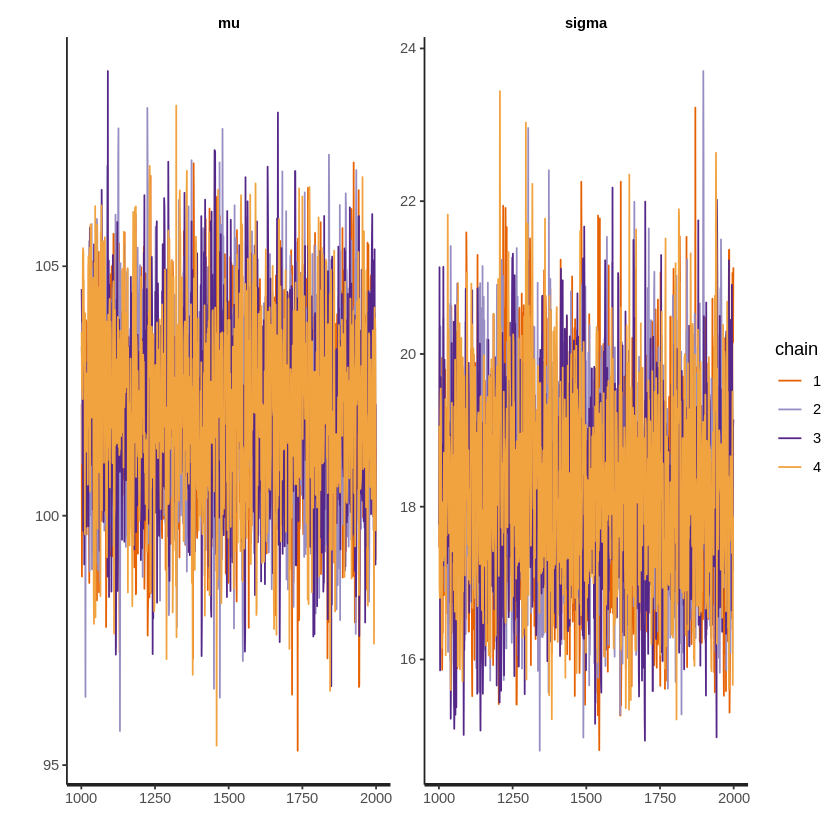

In [13]:
traceplot(mcmc_result)